In [2]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
import os
print(os.getcwd())


C:\Users\Vedant\Project2


In [5]:

print(os.listdir('./data'))

['Garbage classification', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files.txt', 'zero-indexed-files.txt']


In [6]:
print(os.listdir('./data/Garbage classification'))

['Garbage classification']


In [7]:
print(os.listdir('./data/Garbage classification/Garbage classification'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [8]:
# Step 2

# Define correct data path
data_path = './data/Garbage classification/Garbage classification'

# Image and batch sizes
img_size = (128, 128)
batch_size = 32

# Set up data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Class Labels: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


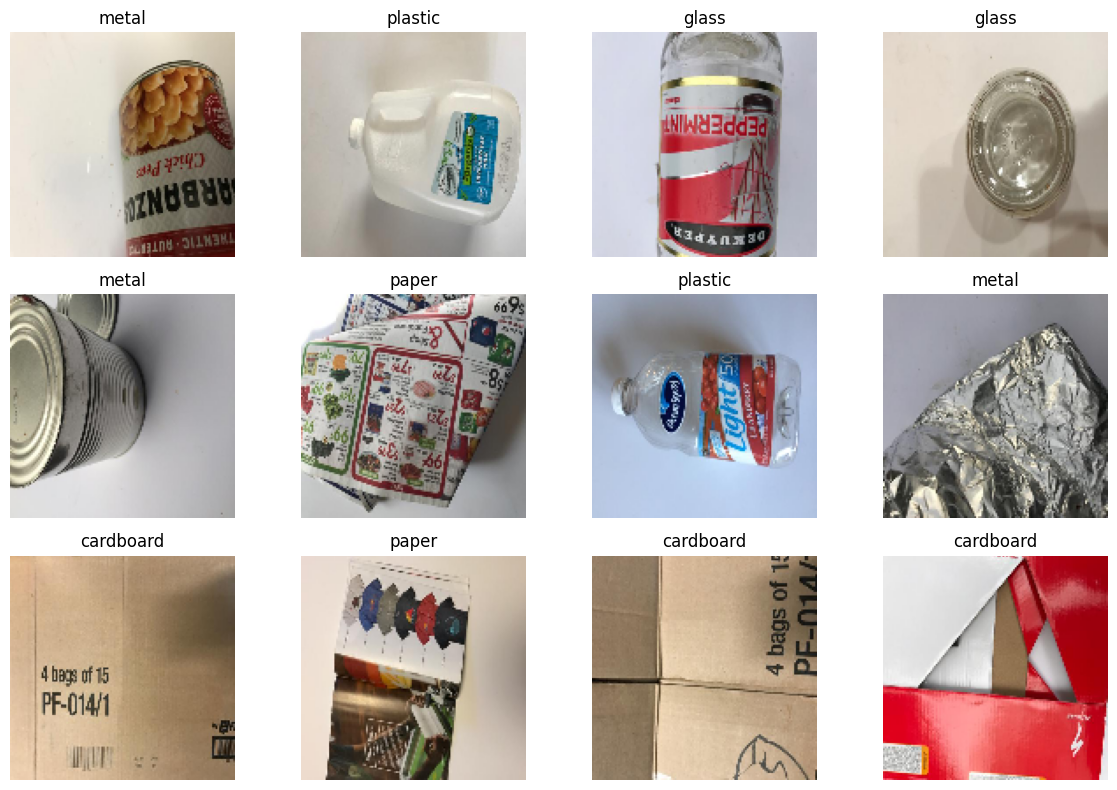

In [9]:
# Step 3: Visualize a batch of training images

class_names = list(train_generator.class_indices.keys())
print("Class Labels:", train_generator.class_indices)

# Plot a few sample images
images, labels = next(train_generator)

plt.figure(figsize=(12, 8))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Step 4: Define the CNN model

model = Sequential()

# Convolution + Pooling Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution + Pooling Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution + Pooling Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # helps prevent overfitting
model.add(Dense(6, activation='softmax'))  # 6 output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


C:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 5: Train the CNN with EarlyStopping

# Add early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # wait 5 epochs before stopping if no improvement
    restore_best_weights=True  # restore weights from best validation accuracy
)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)


C:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.2445 - loss: 1.6921 - val_accuracy: 0.3777 - val_loss: 1.5482
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.4008 - loss: 1.4338 - val_accuracy: 0.3817 - val_loss: 1.5059
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.4885 - loss: 1.3390 - val_accuracy: 0.3837 - val_loss: 1.4625
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5085 - loss: 1.2829 - val_accuracy: 0.4076 - val_loss: 1.4443
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.5152 - loss: 1.2204 - val_accuracy: 0.4493 - val_loss: 1.3922
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5487 - loss: 1.1614 - val_accuracy: 0.4672 - val_loss: 1.3749
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5688 - loss: 1.1341 - val_accuracy: 0.4732 - val_loss: 1.3576
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5823 - loss: 1.0834 - val_accu

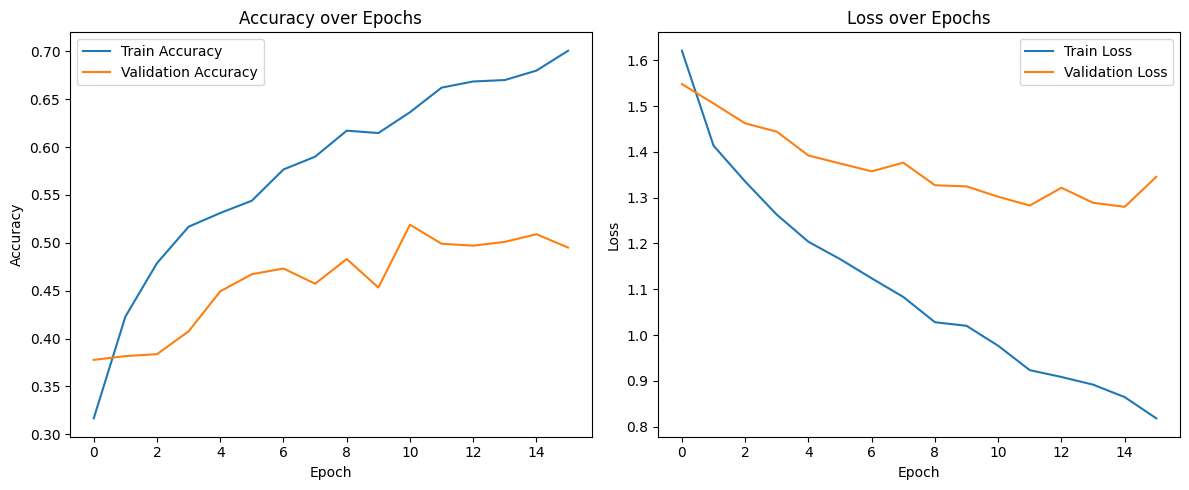

In [12]:
# Step 6: Plot training vs validation accuracy and loss

# Accuracy Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Step 7: Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5025 - loss: 1.2962

Validation Accuracy: 0.52
Validation Loss: 1.3022


Predict and Visualise

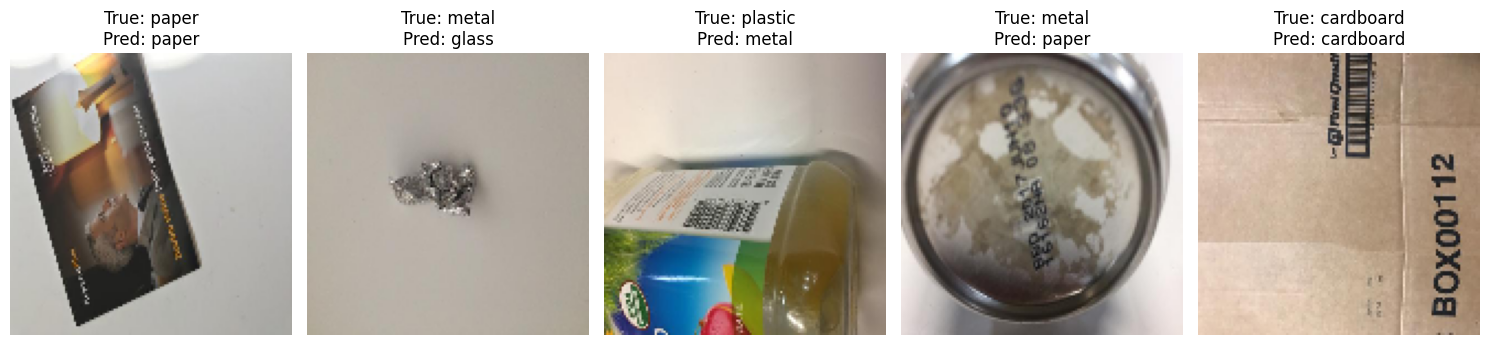

In [15]:
# Invert the class_indices dictionary to get: {0: 'cardboard', 1: 'glass', ...}
class_indices_inv = {v: k for k, v in val_generator.class_indices.items()}

# Get a batch from the validation set
images, labels = next(val_generator)

# Pick 5 random images
import random
random_indices = random.sample(range(len(images)), 5)

# Plot predictions
plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image = images[idx]
    true_label = np.argmax(labels[idx])
    
    # Predict on a single image
    prediction = model.predict(image[np.newaxis, ...], verbose=0)
    predicted_label = np.argmax(prediction)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"True: {class_indices_inv[true_label]}\nPred: {class_indices_inv[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
# Save the model
model.save('./garbage_model.keras')
print("Model saved as garbage_model")

Model saved as garbage_model


In [19]:
#load back the model
from tensorflow.keras.models import load_model
model = load_model('./garbage_model.keras')
